# Specificity vs. vagueness in political communication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from tqdm import tqdm
from datetime import datetime,timedelta
from scipy import stats
tqdm.pandas(desc='Cleaning')

from scorers.cleaning import *
from scorers.specificity_vs_vagueness import *

In [2]:
# Manifestos
manifestos = pd.read_csv('../manifesto-forewords/manifestos.csv')
manifestos.year = pd.to_datetime(manifestos.year)
manifestos = manifestos[manifestos.year>='1945-01-01']
# PMQs answers
pmqs = pd.read_csv('../hansard-pmqs/hansard_pmqs.csv')
pmqs.date = pd.to_datetime(pmqs.date)
pmqs = pmqs[pmqs.date>='1945-01-01']
pmqs = pd.DataFrame({'date':pmqs.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)).index,
                     'answer_text':pmqs.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)),
                     'answerer_party':pmqs.groupby(by='date').answerer_party.aggregate(lambda x: x.mode()),
                     'answerer_name':pmqs.groupby(by='date').answerer_name.aggregate(lambda x: x.mode())})
# Conference speeches
conferences = pd.read_csv('../conference-speeches/conference.csv')
conferences = conferences.drop('Unnamed: 0', axis=1)
conferences.year = conferences.year.apply(lambda year: pd.to_datetime(str(year)+'-01-01'))
conferences = conferences[conferences.year>='1945-01-01']

In [3]:
# Manifestos
manifestos_clean = manifestos.foreword.progress_apply(lambda x: clean(x)) # ...clean them
manifestos_nans = [idx for idx,foreword in enumerate(manifestos_clean) if len(foreword)==0] # ...save NAN indexes to a list
manifestos_scores = [measure_vagueness(foreword) for foreword in tqdm(manifestos_clean,desc='Scoring manifestos') if len(foreword)>0] # ...score them
manifestos_vecs = [list(score_dict.values()) for score_dict in tqdm(manifestos_scores,desc='Saving manifesto scores')] # ...save scores as a list
# PMQs answers
pmqs_clean = pmqs.answer_text.progress_apply(lambda x: clean(x))
pmqs_nans = [idx for idx,answer in enumerate(pmqs_clean) if len(answer)==0]
pmqs_scores = [measure_vagueness(answer) for answer in tqdm(pmqs_clean,desc='Scoring PMQs answers') if len(answer)>0]
pmqs_vecs = [list(score_dict.values()) for score_dict in tqdm(pmqs_scores,desc='Saving PMQs answer scores')]
# Conference speeches
conferences_clean = conferences.content.progress_apply(lambda x: clean(x))
conferences_nans = [idx for idx,speech in enumerate(conferences_clean) if len(speech)==0]
conferences_scores = [measure_vagueness(speech) for speech in tqdm(conferences_clean,desc='Scoring conference speeches') if len(speech)>0]
conferences_vecs = [list(score_dict.values()) for score_dict in tqdm(conferences_scores,desc='Saving conference speech scores')]

Saving conference speech scores: 100%|████████████████████████████████████████████████████████████████████████████████| 183/183 [00:00<00:00, 15334.28it/s]



 Inverse_Deictic_Word_Freq
	 Manifestos
1945-64 vs. 1964-79:	Change: + ; T-stat: -1.58; P-value: 0.1239
1964-79 vs. 1979-97:	Change: + ; T-stat: -2.37*; P-value: 0.0254
1979-97 vs. 1997-now:	Change: - ; T-stat: 0.91; P-value: 0.3676
	 PMQs
1945-64 vs. 1964-79:	Change: - ; T-stat: 0.76; P-value: 0.4492
1964-79 vs. 1979-97:	Change: - ; T-stat: 2.32*; P-value: 0.0206
1979-97 vs. 1997-now:	Change: + ; T-stat: -2.95**; P-value: 0.0032
	 Conferences
1945-64 vs. 1964-79:	Change: - ; T-stat: 2.80**; P-value: 0.0070
1964-79 vs. 1979-97:	Change: + ; T-stat: -2.59*; P-value: 0.0112
1979-97 vs. 1997-now:	Change: + ; T-stat: -7.55***; P-value: 0.0000


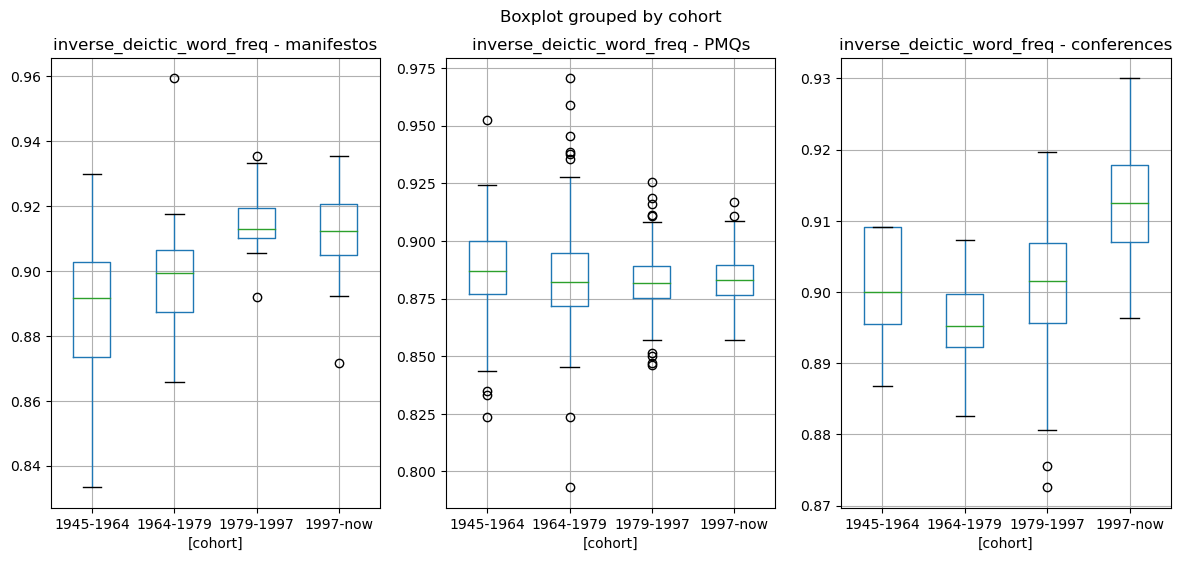


 Approximator_Word_Freq
	 Manifestos
1945-64 vs. 1964-79:	Change: + ; T-stat: -2.29*; P-value: 0.0288
1964-79 vs. 1979-97:	Change: - ; T-stat: 1.21; P-value: 0.2382
1979-97 vs. 1997-now:	Change: + ; T-stat: -1.25; P-value: 0.2176
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.29; P-value: 0.7751
1964-79 vs. 1979-97:	Change: - ; T-stat: 4.20***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -6.11***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -1.92; P-value: 0.0598
1964-79 vs. 1979-97:	Change: + ; T-stat: -1.39; P-value: 0.1696
1979-97 vs. 1997-now:	Change: + ; T-stat: -4.92***; P-value: 0.0000


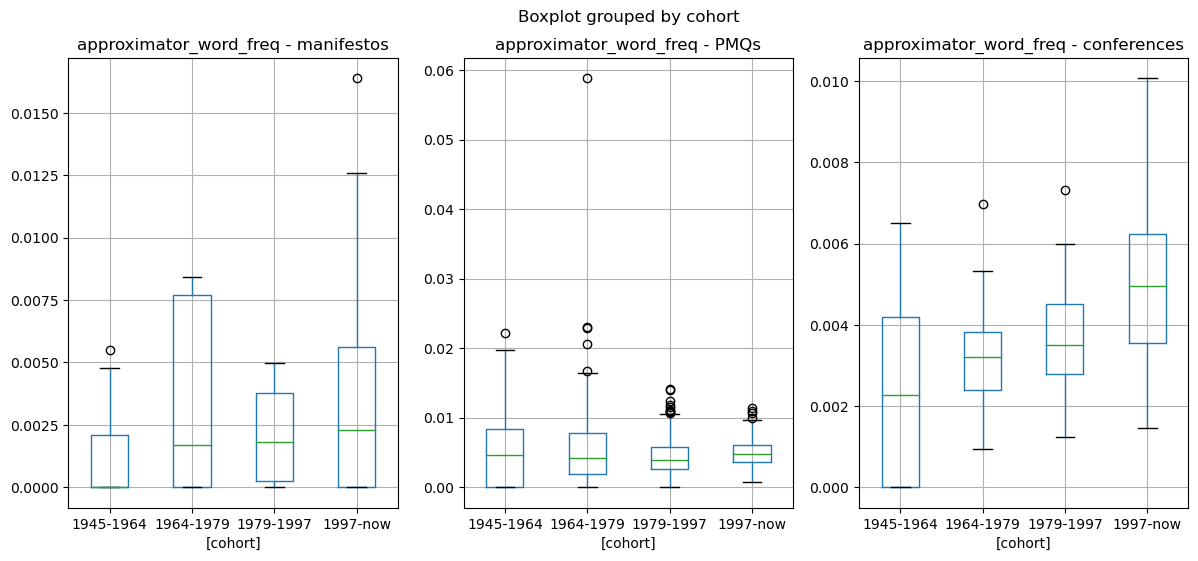


 Inverse_Shield_Word_Freq
	 Manifestos
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.42; P-value: 0.6745
1964-79 vs. 1979-97:	Change: - ; T-stat: 0.09; P-value: 0.9269
1979-97 vs. 1997-now:	Change: + ; T-stat: -0.33; P-value: 0.7396
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -2.35*; P-value: 0.0195
1964-79 vs. 1979-97:	Change: + ; T-stat: -6.39***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -15.69***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.40; P-value: 0.6889
1964-79 vs. 1979-97:	Change: + ; T-stat: -0.26; P-value: 0.7935
1979-97 vs. 1997-now:	Change: + ; T-stat: -5.26***; P-value: 0.0000


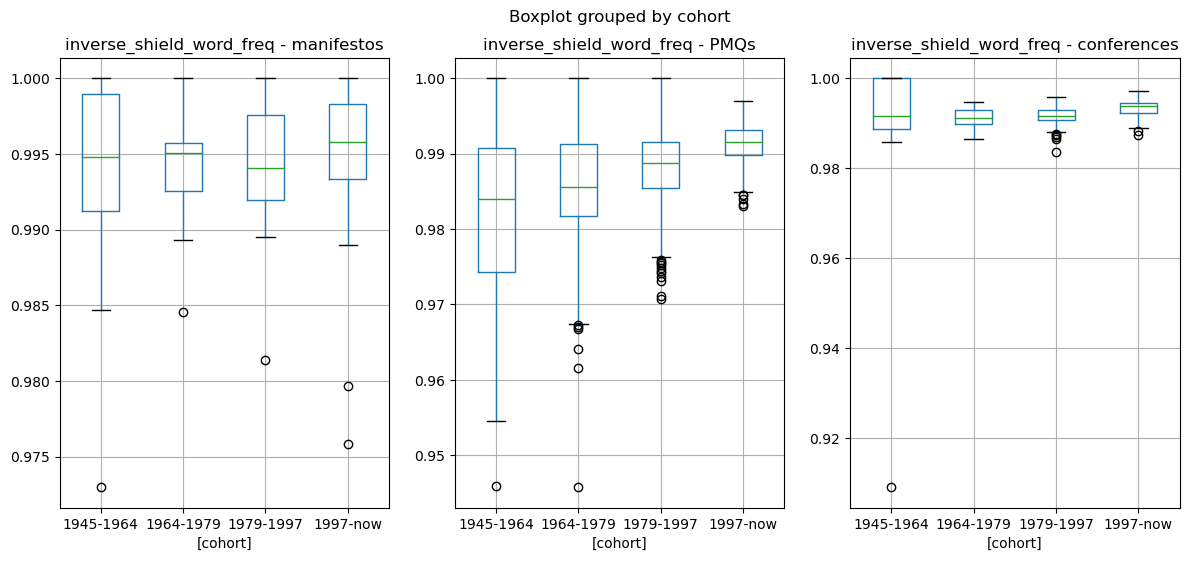


 Booster_Word_Freq
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 0.56; P-value: 0.5828
1964-79 vs. 1979-97:	Change: + ; T-stat: -0.44; P-value: 0.6654
1979-97 vs. 1997-now:	Change: + ; T-stat: -0.67; P-value: 0.5059
	 PMQs
1945-64 vs. 1964-79:	Change: - ; T-stat: 2.14*; P-value: 0.0336
1964-79 vs. 1979-97:	Change: - ; T-stat: 1.60; P-value: 0.1099
1979-97 vs. 1997-now:	Change: + ; T-stat: -9.41***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -2.43*; P-value: 0.0181
1964-79 vs. 1979-97:	Change: + ; T-stat: -3.51***; P-value: 0.0007
1979-97 vs. 1997-now:	Change: - ; T-stat: 0.47; P-value: 0.6399


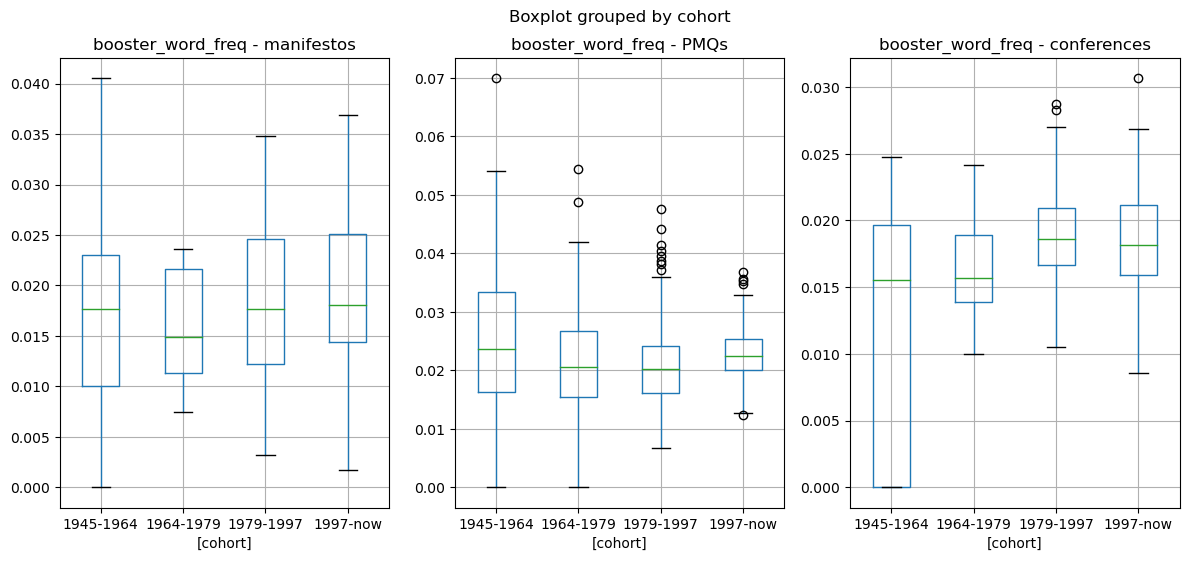


 Avg_Semantic_Size
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 1.08; P-value: 0.2873
1964-79 vs. 1979-97:	Change: + ; T-stat: -0.85; P-value: 0.4044
1979-97 vs. 1997-now:	Change: - ; T-stat: 0.59; P-value: 0.5567
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -3.44***; P-value: 0.0007
1964-79 vs. 1979-97:	Change: + ; T-stat: -7.57***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -17.88***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: - ; T-stat: 0.91; P-value: 0.3664
1964-79 vs. 1979-97:	Change: + ; T-stat: -2.46*; P-value: 0.0157
1979-97 vs. 1997-now:	Change: + ; T-stat: -0.94; P-value: 0.3473


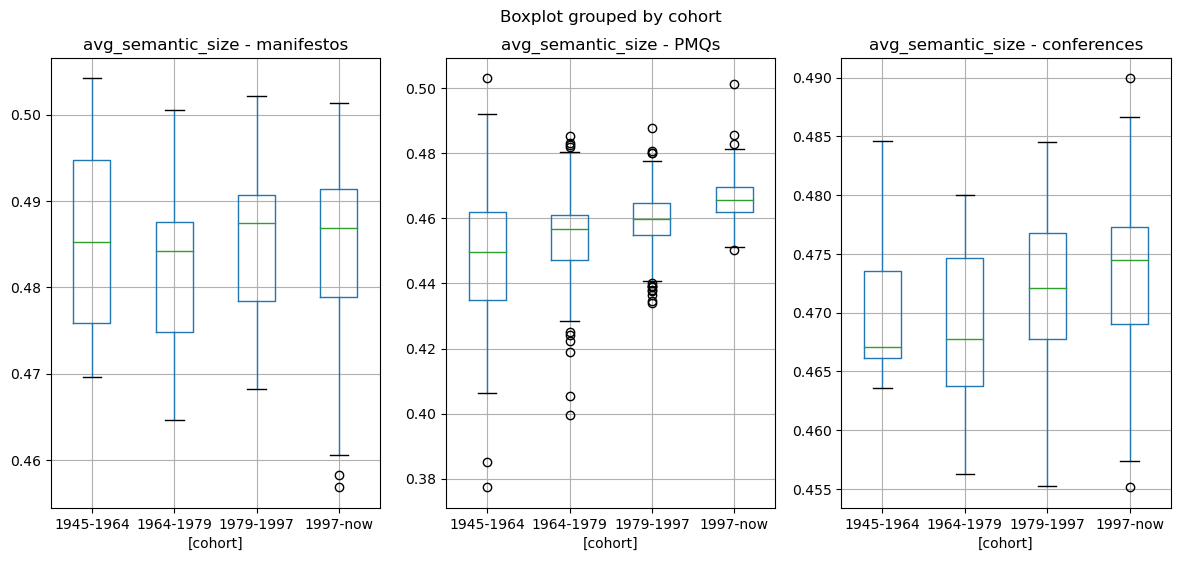

In [4]:
source_dict = {0:'Manifestos',
               1:'PMQs',
               2:'Conferences'}
cohort_dict = {'1945-1964':(pd.to_datetime('1945-01-01'),pd.to_datetime('1964-10-17')),
               '1964-1979':(pd.to_datetime('1964-10-17'),pd.to_datetime('1979-05-05')),
               '1979-1997':(pd.to_datetime('1979-05-05'),pd.to_datetime('1997-05-03')),
               '1997-now':(pd.to_datetime('1997-05-03'),pd.to_datetime('2022-06-14'))}
cohort_checker = lambda date: [cohort for cohort,date_range in cohort_dict.items() if date>=date_range[0] and date<date_range[1]][0]

sign = lambda num: '-' if num>0 else '+' # Flipped because a neg. t-score indicates mean(sample_2)>mean(sample_1)
stars = lambda num: '***' if num<0.001 else '**' if num<0.01 else '*' if num<0.05 else ''

for score in list(manifestos_scores[0].keys()):
    manifestos_with_scores = manifestos.copy()
    manifestos_with_scores[score] = [score_dict[score] for score_dict in manifestos_scores]
    manifestos_with_scores['cohort'] = manifestos_with_scores['year'].apply(cohort_checker)
    
    pmqs_with_scores = pmqs.copy()
    pmqs_with_scores[score] = [score_dict[score] for score_dict in pmqs_scores]
    pmqs_with_scores['cohort'] = pmqs_with_scores['date'].apply(cohort_checker)
    
    conferences_with_scores = conferences.copy()
    conferences_with_scores[score] = [score_dict[score] for score_dict in conferences_scores]
    conferences_with_scores['cohort'] = conferences_with_scores['year'].apply(cohort_checker)

    cohort_diffs = {0:dict(),1:dict(),2:dict()}
    for idx,df in enumerate([manifestos_with_scores,pmqs_with_scores,conferences_with_scores]):
        cohort_diffs[idx]['1945-64 vs. 1964-79'] = stats.ttest_ind(df[df['cohort']=='1945-1964'][score].to_numpy(),
                                                                   df[df['cohort']=='1964-1979'][score].to_numpy())
        cohort_diffs[idx]['1964-79 vs. 1979-97'] = stats.ttest_ind(df[df['cohort']=='1964-1979'][score].to_numpy(),
                                                                   df[df['cohort']=='1979-1997'][score].to_numpy())
        cohort_diffs[idx]['1979-97 vs. 1997-now'] = stats.ttest_ind(df[df['cohort']=='1979-1997'][score].to_numpy(),
                                                                    df[df['cohort']=='1997-now'][score].to_numpy())
    
    print("\n",score.title())
    for source,cohort_diff in cohort_diffs.items():
        print("\t",source_dict[source])
        for name,diff in cohort_diff.items():
            print("{}:\tChange: {} ; T-stat: {:.2f}{}; P-value: {:.4f}".format(name, sign(diff.statistic), diff.statistic, stars(diff.pvalue), diff.pvalue))
        
    fig,axs = plt.subplots(1,3, figsize=(14,6))
    manifestos_with_scores.boxplot(by='cohort', ax=axs[0])
    axs[0].set_title(score+' - manifestos')
    pmqs_with_scores.boxplot(by='cohort', ax=axs[1])
    axs[1].set_title(score+' - PMQs')
    conferences_with_scores.boxplot(by='cohort', ax=axs[2])
    axs[2].set_title(score+' - conferences')
    plt.show()
      

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:07<00:00, 289.85it/s]


<Figure size 640x480 with 0 Axes>

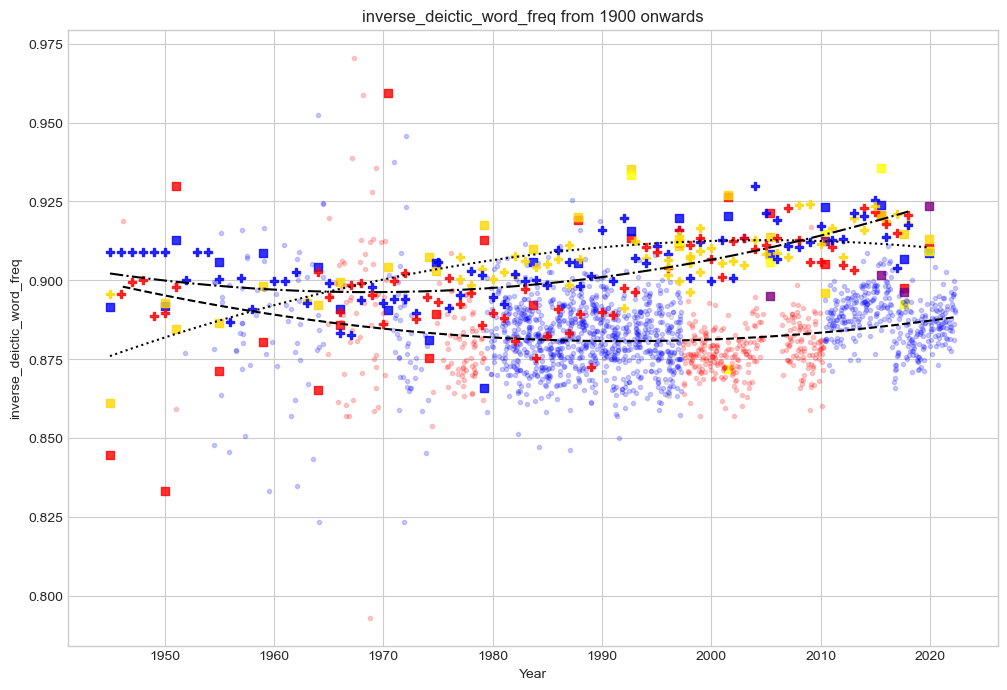

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:07<00:00, 260.78it/s]


<Figure size 640x480 with 0 Axes>

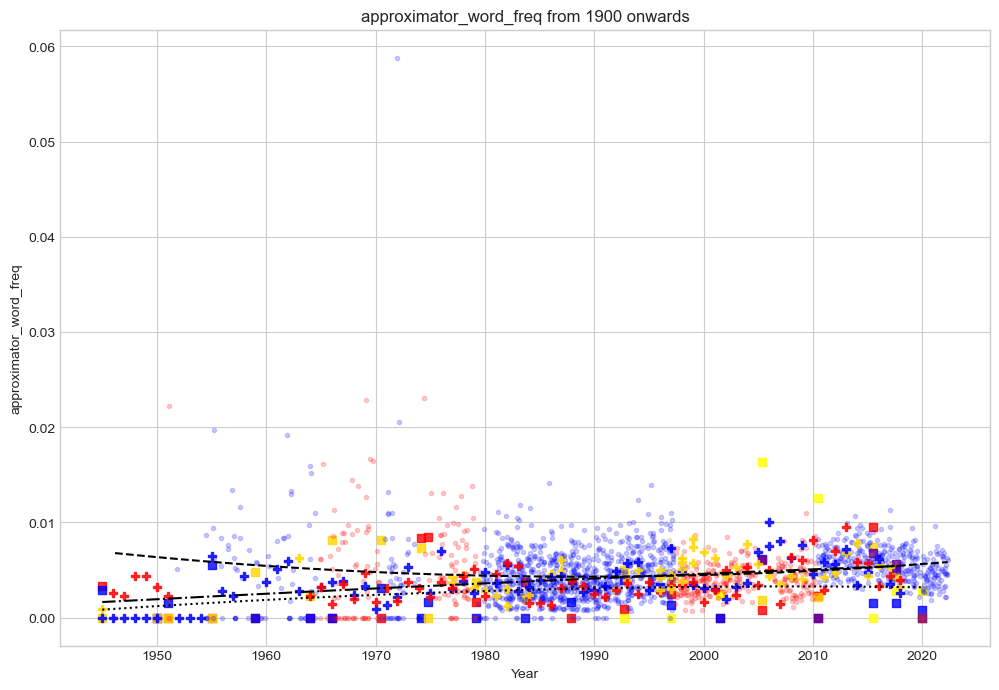

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 245.92it/s]


<Figure size 640x480 with 0 Axes>

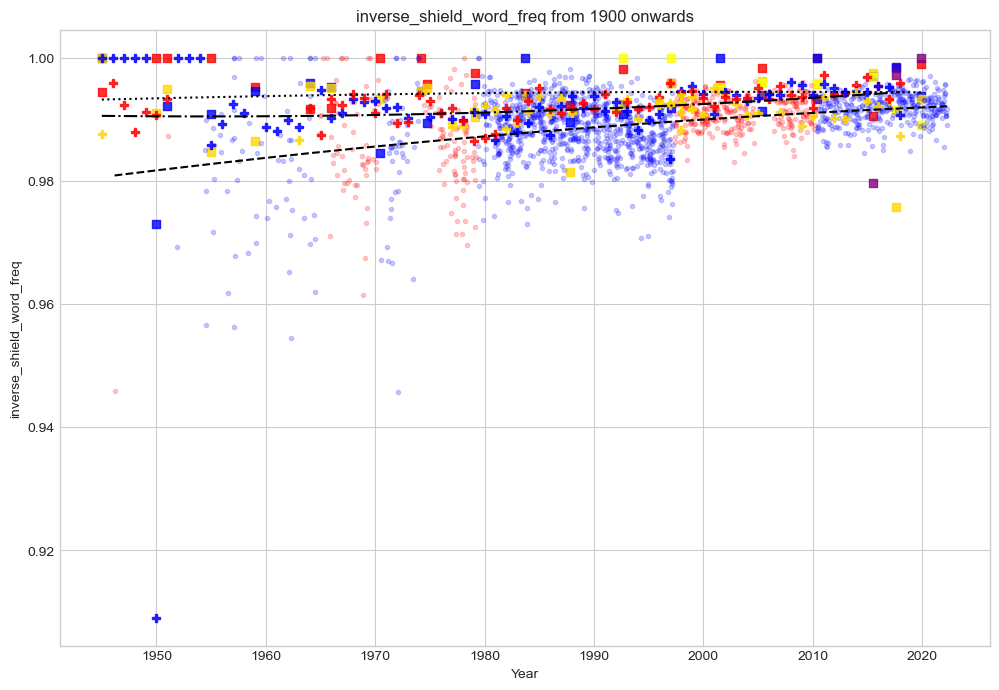

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 243.32it/s]


<Figure size 640x480 with 0 Axes>

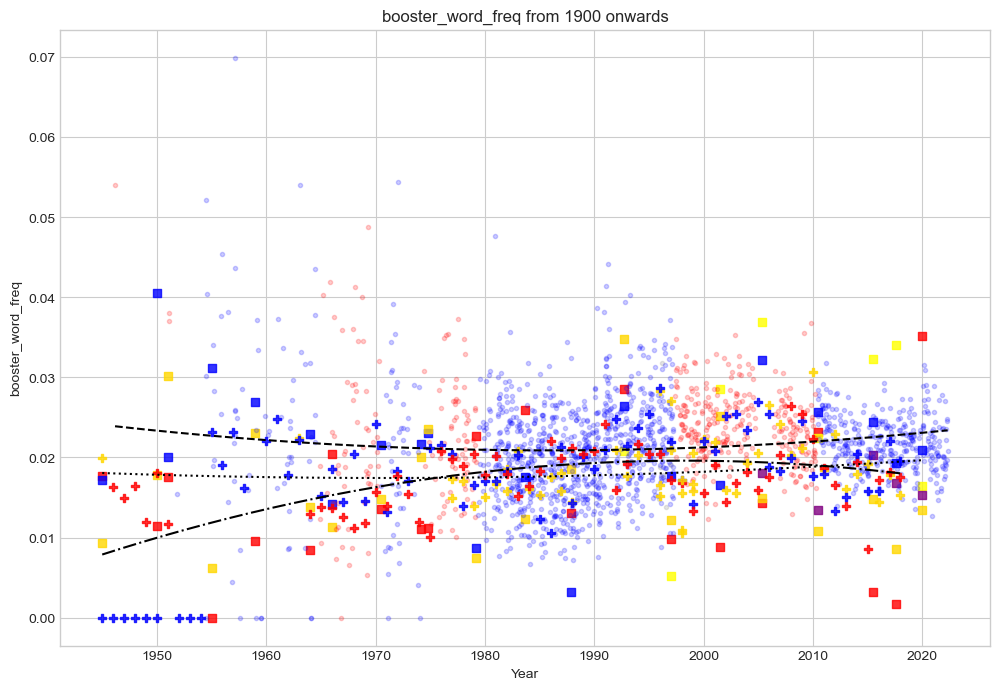

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 240.49it/s]


<Figure size 640x480 with 0 Axes>

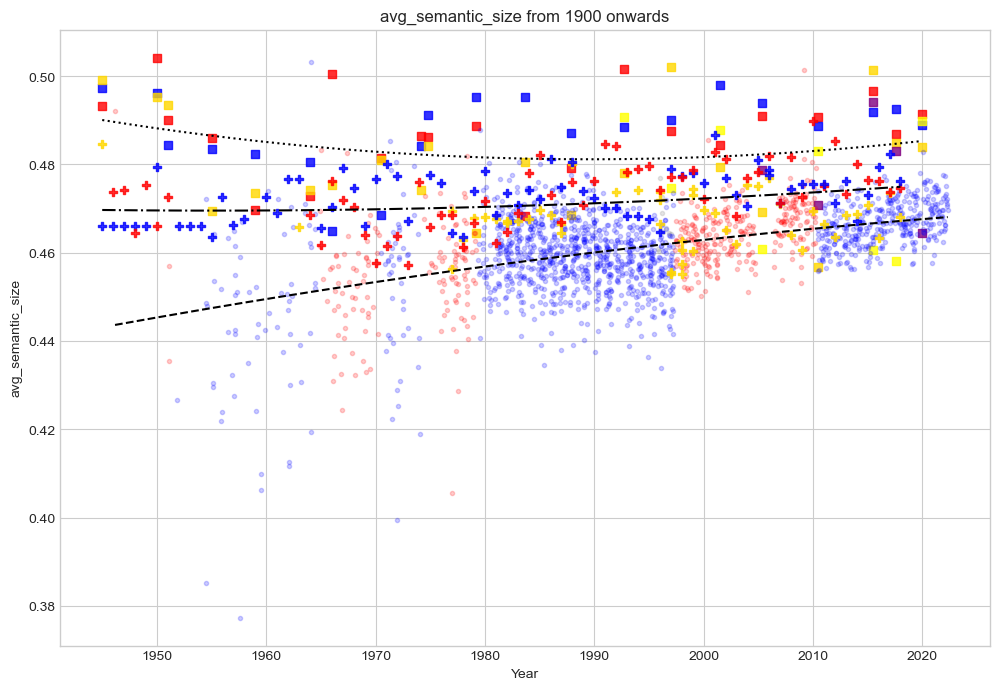

In [5]:
party_dict = {'Labour':'LAB',
              'Conservative':'CON',
              'Liberal':'LIB',
              'SDP-Liberal Alliance':'LIB',
              'Liberal Democrat':'LIB',
              np.nan:'NAN'}

for s_idx,scoring_var in enumerate(manifestos_scores[0].keys()):
    plt.clf()
    manifestos_df = pd.DataFrame({'score':[x[s_idx] for x in manifestos_vecs],
                                  'type':['manifesto']*len(manifestos_vecs),
                                  'year':manifestos.drop(manifestos_nans, axis=0).year,
                                  'party':manifestos.drop(manifestos_nans, axis=0).party})
    pmqs_df = pd.DataFrame({'score':[x[s_idx] for x in pmqs_vecs],
                           'type':['PMQs']*len(pmqs_vecs),
                           'year':pmqs.drop(pmqs_nans, axis=0).date,
                           'party':pmqs.drop(pmqs_nans, axis=0).answerer_party.apply(lambda party: party_dict[str(party)] if str(party) in party_dict.keys() else 'NAN')})
    conferences_df = pd.DataFrame({'score':[x[s_idx] for x in conferences_vecs],
                                   'type':['conference']*len(conferences_vecs),
                                   'year':conferences.drop(conferences_nans, axis=0).year,
                                   'party':conferences.drop(conferences_nans, axis=0).party.apply(lambda party: party_dict[party])})
    var_df = pd.DataFrame({'score':[],'type':[],'year':[],'party':[]})
    var_df = var_df.append(manifestos_df)
    var_df = var_df.append(pmqs_df)
    var_df = var_df.append(conferences_df)

    col_dict = {'LAB':'red','CON':'blue','LIB':'gold','SNP':'yellow','UKIP':'purple','BRX':'purple','NAN':'grey'}
    marker_dict = {'manifesto':'s','PMQs':'.','conference':'P'}
    alpha_dict = {'manifesto':0.8,'PMQs':0.2,'conference':0.8}

    plt.style.use('seaborn-whitegrid')
    fig,ax = plt.subplots(1, figsize=(12,8))
    var_df.progress_apply(lambda row: ax.scatter(row.year, row.score,
                                                              color=col_dict[row.party],
                                                              marker=marker_dict[row.type],
                                                              alpha=alpha_dict[row.type]),
                                       axis=1)

    # Plot line of best fit for manifestos
    deg = 2
    x = np.array([date for date in manifestos.drop(manifestos_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in manifestos_scores])
    coefs = np.polyfit(native_x, y, deg=deg)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
    yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
    ax.plot(pd.to_datetime(xseq), yseq, ':', color='black')
    # ...PMQs
    x = np.array([date for date in pmqs.drop(pmqs_nans, axis=0).date])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in pmqs_scores])
    coefs = np.polyfit(native_x, y, deg=deg)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
    yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
    ax.plot(pd.to_datetime(xseq), yseq, '--', color='black')
    # ...and conference speeches
    x = np.array([date for date in conferences.drop(conferences_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in conferences_scores])
    coefs = np.polyfit(native_x, y, deg=deg)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
    yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
    ax.plot(pd.to_datetime(xseq), yseq, '-.', color='black')
    ax.set_xlabel("Year")
    ax.set_ylabel(scoring_var)
    ax.set_title(scoring_var+" from 1900 onwards")
    plt.show()

In [6]:
from sklearn.decomposition import NMF

X = manifestos_vecs+pmqs_vecs+conferences_vecs

nmf = NMF(n_components=1)
nmf.fit(X)

for name,loading in zip(manifestos_scores[0].keys(), nmf.components_[0]):
    print("{}: {:.4f}".format(name,loading))

inverse_deictic_word_freq: 5.0336
approximator_word_freq: 0.0257
inverse_shield_word_freq: 5.6244
booster_word_freq: 0.1193
avg_semantic_size: 2.6299


C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [7]:
manifestos_df = pd.DataFrame({'score':nmf.transform(manifestos_vecs).squeeze(),
                              'type':['manifesto']*len(manifestos_vecs),
                              'year':manifestos.drop(manifestos_nans, axis=0).year,
                              'party':manifestos.drop(manifestos_nans, axis=0).party})
pmqs_df = pd.DataFrame({'score':nmf.transform(pmqs_vecs).squeeze(),
                        'type':['PMQs']*len(pmqs_vecs),
                        'year':pmqs.drop(pmqs_nans, axis=0).date,
                        'party':pmqs.drop(pmqs_nans, axis=0).answerer_party.apply(lambda party: party_dict[str(party)] if str(party) in party_dict.keys() else 'NAN')})
conferences_df = pd.DataFrame({'score':nmf.transform(conferences_vecs).squeeze(),
                               'type':['conference']*len(conferences_vecs),
                               'year':conferences.drop(conferences_nans, axis=0).year,
                               'party':conferences.drop(conferences_nans, axis=0).party.apply(lambda party: party_dict[party])})
var_df = pd.DataFrame({'score':[],'type':[],'year':[],'party':[]})
var_df = var_df.append(manifestos_df)
var_df = var_df.append(pmqs_df)
var_df = var_df.append(conferences_df)

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 250.45it/s]


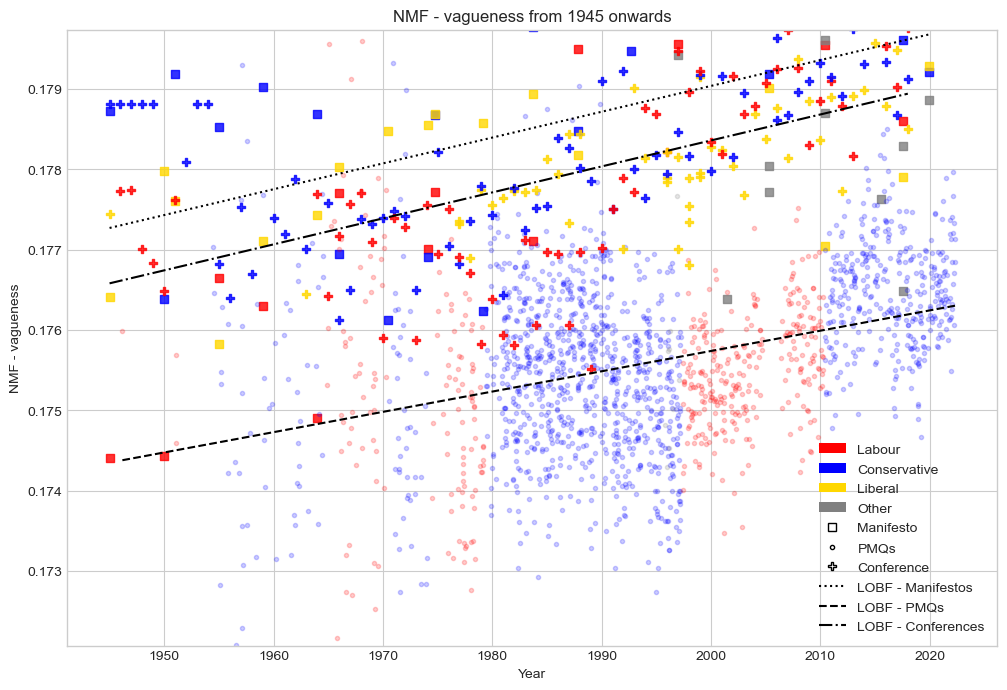

In [11]:
col_dict = {'LAB':'red','CON':'blue','LIB':'gold','SNP':'grey','UKIP':'grey','BRX':'grey','NAN':'grey'}
legend_col_dict = {'LAB':'red','CON':'blue','LIB':'gold','OTHER':'grey'}
marker_dict = {'manifesto':'s','PMQs':'.','conference':'P'}
alpha_dict = {'manifesto':0.8,'PMQs':0.2,'conference':0.8}

plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1, figsize=(12,8))
        
var_df.progress_apply(lambda row: ax.scatter(row.year, row.score,
                                                          color=col_dict[row.party],
                                                          marker=marker_dict[row.type],
                                                          alpha=alpha_dict[row.type]),
                                   axis=1)

# Plot line of best fit for manifestos
deg = 1
x = np.array([date for date in manifestos.drop(manifestos_nans, axis=0).year])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(manifestos_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, ':', color='black')

# ...PMQs
x = np.array([date for date in pmqs.drop(pmqs_nans, axis=0).date])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(pmqs_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, '--', color='black')

# ...and conference speeches
x = np.array([date for date in conferences.drop(conferences_nans, axis=0).year])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(conferences_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, '-.', color='black')

ax.set_ylim(max(var_df.score.mean()-(2.6*var_df.score.std()), var_df.score.min()),
            min(var_df.score.mean()+(2.6*var_df.score.std()), var_df.score.max()))
ax.set_xlabel("Year")
ax.set_ylabel("NMF - vagueness")
ax.set_title("NMF - vagueness from 1945 onwards")

colour_labels = ["Labour","Conservative","Liberal","Other"]
marker_labels = ["Manifesto","PMQs","Conference"]
line_labels = ["LOBF - Manifestos","LOBF - PMQs","LOBF - Conferences"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in legend_col_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]
line_artists = [mlines.Line2D([],[], linestyle=line_type, color='black') for line_type in [':','--','-.']]

ax.legend(colour_artists+marker_artists+line_artists,
          colour_labels+marker_labels+line_labels)

plt.savefig('../figs/nmf/vagueness.png')
plt.show()

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 254.17it/s]


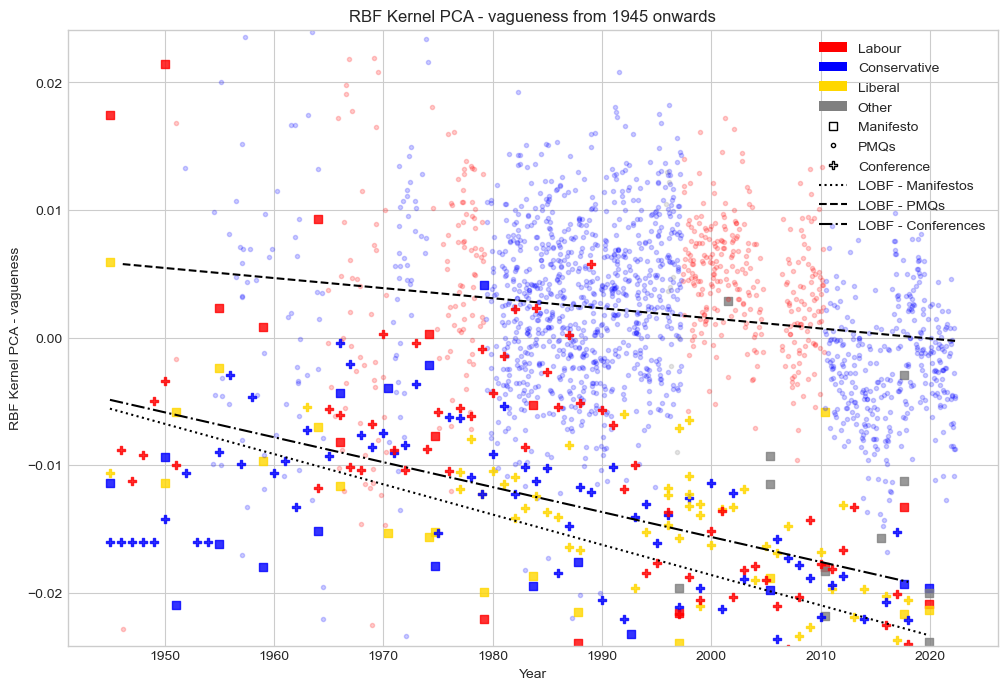

In [12]:
from sklearn.decomposition import KernelPCA

X = manifestos_vecs+pmqs_vecs+conferences_vecs

kpca = KernelPCA(n_components=1,kernel='rbf')
kpca.fit(X)
    
manifestos_df = pd.DataFrame({'score':kpca.transform(manifestos_vecs).squeeze(),
                              'type':['manifesto']*len(manifestos_vecs),
                              'year':manifestos.drop(manifestos_nans, axis=0).year,
                              'party':manifestos.drop(manifestos_nans, axis=0).party})
pmqs_df = pd.DataFrame({'score':kpca.transform(pmqs_vecs).squeeze(),
                        'type':['PMQs']*len(pmqs_vecs),
                        'year':pmqs.drop(pmqs_nans, axis=0).date,
                        'party':pmqs.drop(pmqs_nans, axis=0).answerer_party.apply(lambda party: party_dict[str(party)] if str(party) in party_dict.keys() else 'NAN')})
conferences_df = pd.DataFrame({'score':kpca.transform(conferences_vecs).squeeze(),
                               'type':['conference']*len(conferences_vecs),
                               'year':conferences.drop(conferences_nans, axis=0).year,
                               'party':conferences.drop(conferences_nans, axis=0).party.apply(lambda party: party_dict[party])})
var_df = pd.DataFrame({'score':[],'type':[],'year':[],'party':[]})
var_df = var_df.append(manifestos_df)
var_df = var_df.append(pmqs_df)
var_df = var_df.append(conferences_df)

col_dict = {'LAB':'red','CON':'blue','LIB':'gold','SNP':'grey','UKIP':'grey','BRX':'grey','NAN':'grey'}
legend_col_dict = {'LAB':'red','CON':'blue','LIB':'gold','OTHER':'grey'}
marker_dict = {'manifesto':'s','PMQs':'.','conference':'P'}
alpha_dict = {'manifesto':0.8,'PMQs':0.2,'conference':0.8}

plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1, figsize=(12,8))
        
var_df.progress_apply(lambda row: ax.scatter(row.year, row.score,
                                                          color=col_dict[row.party],
                                                          marker=marker_dict[row.type],
                                                          alpha=alpha_dict[row.type]),
                                   axis=1)

# Plot line of best fit for manifestos
deg = 1
x = np.array([date for date in manifestos.drop(manifestos_nans, axis=0).year])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(manifestos_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, ':', color='black')

# ...PMQs
x = np.array([date for date in pmqs.drop(pmqs_nans, axis=0).date])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(pmqs_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, '--', color='black')

# ...and conference speeches
x = np.array([date for date in conferences.drop(conferences_nans, axis=0).year])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(conferences_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, '-.', color='black')

ax.set_ylim(max(var_df.score.mean()-(2.6*var_df.score.std()), var_df.score.min()),
            min(var_df.score.mean()+(2.6*var_df.score.std()), var_df.score.max()))
ax.set_xlabel("Year")
ax.set_ylabel("RBF Kernel PCA - vagueness")
ax.set_title("RBF Kernel PCA - vagueness from 1945 onwards")

colour_labels = ["Labour","Conservative","Liberal","Other"]
marker_labels = ["Manifesto","PMQs","Conference"]
line_labels = ["LOBF - Manifestos","LOBF - PMQs","LOBF - Conferences"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in legend_col_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]
line_artists = [mlines.Line2D([],[], linestyle=line_type, color='black') for line_type in [':','--','-.']]

ax.legend(colour_artists+marker_artists+line_artists,
          colour_labels+marker_labels+line_labels)

plt.savefig('../figs/kpca/vagueness.png')
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

current_day = datetime.strftime(datetime.now(), format="%Y-%m-%d")
pm_list = [['Neville Chamberlain',('1937-05-29','1940-05-09')],
               ['Winston Churchill (1)',('1940-05-10','1945-07-26')],
               ['Clement Attlee',('1945-07-27','1951-10-26')],
               ['Winston Churchill (2)',('1951-10-27','1955-04-05')],
               ['Anthony Eden',('1955-04-06','1957-01-09')],
               ['Harold Macmillan',('1957-01-10','1963-10-18')],
               ['Alec Douglas-Home',('1963-10-19','1964-10-16')],
               ['Harold Wilson (1)',('1964-10-17','1970-06-19')],
               ['Edward Heath',('1970-06-20','1974-03-04')],
               ['Harold Wilson (2)',('1974-03-05','1976-04-05')],
               ['James Callaghan',('1976-04-06','1979-05-04')],               
               ['Margaret Thatcher',('1979-05-05','1990-11-28')],
               ['John Major',('1990-11-29','1997-05-02')],
               ['Tony Blair',('1997-05-03','2007-06-27')],
               ['Gordon Brown',('2007-06-28','2010-05-11')],
               ['David Cameron',('2010-05-12','2016-07-13')],
               ['Theresa May',('2016-07-14','2019-07-24')],
               ['Boris Johnson',('2019-07-25',current_day)]]
pmqs_for_boxplot = pd.read_csv('../hansard-pmqs/hansard_pmqs.csv')
pmqs_for_boxplot.date = pd.to_datetime(pmqs_for_boxplot.date)
pmqs_for_boxplot = pmqs_for_boxplot[pmqs_for_boxplot.date>='1937-05-29']
pmqs_for_boxplot = pd.DataFrame({'date':pmqs_for_boxplot.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)).index,
                     'answer_text':pmqs_for_boxplot.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)),
                     'answerer_party':pmqs_for_boxplot.groupby(by='date').answerer_party.aggregate(lambda x: x.mode()),
                     'answerer_name':pmqs_for_boxplot.groupby(by='date').answerer_name.aggregate(lambda x: x.mode())})
pmqs_for_boxplot['answerer_name'] = pmqs_for_boxplot.date.apply(lambda date: [pm for pm,(start_date,end_date) in pm_list if date>=pd.to_datetime(start_date) and date<=pd.to_datetime(end_date)][0])
pmqs_for_boxplot['score'] = [x for x in pmqs_scores]
pmqs_for_boxplot = pmqs_for_boxplot[pmqs_for_boxplot.answerer_party.apply(lambda party: party in ['Conservative','Labour'])]

ValueError: Length of values (1806) does not match length of index (1813)

In [ ]:
for scoring_var in list(pmqs_for_boxplot.score[1].keys()):
    fig,ax = plt.subplots(1, figsize=(26,14))
    ax.boxplot([pmqs_for_boxplot[pmqs_for_boxplot.answerer_name==pm[0]].score.apply(lambda entry: entry[scoring_var]).to_numpy() for pm in pm_list],
               labels=[pm[0] for pm in pm_list])
    ax.set_title(scoring_var+" for Prime Ministers since 1900")
    plt.show()

In [ ]:
import pwlf

party_dict = {'Labour':'LAB',
              'Conservative':'CON',
              'Liberal':'LIB',
              'SDP-Liberal Alliance':'LIB',
              'Liberal Democrat':'LIB',
              np.nan:'NAN'}



for s_idx,scoring_var in enumerate(manifestos_scores[0].keys()):

    plt.clf()
    manifestos_df = pd.DataFrame({'score':[x[s_idx] for x in manifestos_vecs],
                                  'type':['manifesto']*len(manifestos_vecs),
                                  'year':manifestos.drop(manifestos_nans, axis=0).year,
                                  'party':manifestos.drop(manifestos_nans, axis=0).party})
    pmqs_df = pd.DataFrame({'score':[x[s_idx] for x in pmqs_vecs],
                           'type':['PMQs']*len(pmqs_vecs),
                           'year':pmqs.drop(pmqs_nans, axis=0).date,
                           'party':pmqs.drop(pmqs_nans, axis=0).answerer_party.apply(lambda party: party_dict[str(party)] if str(party) in party_dict.keys() else 'NAN')})
    conferences_df = pd.DataFrame({'score':[x[s_idx] for x in conferences_vecs],
                                   'type':['conference']*len(conferences_vecs),
                                   'year':conferences.drop(conferences_nans, axis=0).year,
                                   'party':conferences.drop(conferences_nans, axis=0).party.apply(lambda party: party_dict[party])})
    var_df = pd.DataFrame({'score':[],'type':[],'year':[],'party':[]})
    var_df = var_df.append(manifestos_df)
    var_df = var_df.append(pmqs_df)
    var_df = var_df.append(conferences_df)

    col_dict = {'LAB':'red','CON':'blue','LIB':'gold','SNP':'yellow','UKIP':'purple','BRX':'purple','NAN':'grey'}
    marker_dict = {'manifesto':'s','PMQs':'.','conference':'P'}
    alpha_dict = {'manifesto':0.8,'PMQs':0.2,'conference':0.8}

    plt.style.use('seaborn-whitegrid')
    fig,ax = plt.subplots(1, figsize=(12,8))
    var_df.progress_apply(lambda row: ax.scatter(row.year, row.score,
                                                              color=col_dict[row.party],
                                                              marker=marker_dict[row.type],
                                                              alpha=alpha_dict[row.type]),
                                       axis=1)

    # Plot line of best fit for manifestos
    segments = 4
    x = np.array([date for date in manifestos.drop(manifestos_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in manifestos_scores])
    mani_pwlf = pwlf.PiecewiseLinFit(native_x, y, degree=0)
    mani_pwlf.fit(segments)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    yseq = mani_pwlf.predict(xseq)
    ax.plot(pd.to_datetime(xseq), yseq, ':', color='black')
    # ...PMQs
    x = np.array([date for date in pmqs.drop(pmqs_nans, axis=0).date])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in pmqs_scores])
    pmqs_pwlf = pwlf.PiecewiseLinFit(native_x, y, degree=0)
    pmqs_pwlf.fit(segments)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    yseq = pmqs_pwlf.predict(xseq)
    ax.plot(pd.to_datetime(xseq), yseq, '--', color='black')
    # ...and conference speeches
    x = np.array([date for date in conferences.drop(conferences_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in conferences_scores])
    conf_pwlf = pwlf.PiecewiseLinFit(native_x, y, degree=0)
    conf_pwlf.fit(segments)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    yseq = conf_pwlf.predict(xseq)
    ax.plot(pd.to_datetime(xseq), yseq, '-.', color='black')
    ax.set_xlabel("Year")
    ax.set_ylabel(scoring_var)
    ax.set_title(scoring_var+" from 1900 onwards")
    plt.show()